# Help dr. Vasilescu

What had gone wrong with dr. Vasilescu's approach, was the fact that the robot's controller was not robust enough to model changes. Meaning, that when the robot was holding something considerably heavy (e.g. satelite dish), the controller became unstable and the robot failed. You have to understand dynamic modelling so that you can help dr. Vasilescu calculate it for the MARS-O-HELP.

## Proposed problem

Consider the robotic structure from the figure below with only 1 degree of freedom, for which $l=1\;m$, $m=1\;kg$, and $I= \begin{bmatrix} \frac{1}{12} &0 &0 \\ 0 &0 &0\\ 0 &0 &\frac{1}{12}\end{bmatrix}$.  
  
    a. Compute the equation of motion for the robot based on the Euler-Lagrange formulation.
    b. Implement the robot model in Python using the state space representation and odeint for solving the differential equation. Give the input torque as a sine wave. Interpret the results.

<img src="../artwork/DynMod/1DOF.png" width=50% />  

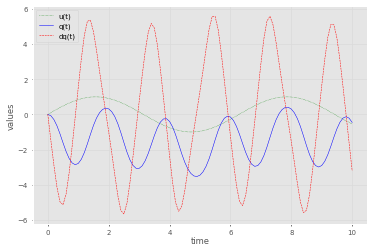

In [10]:
%reset -f
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
from roboticstoolbox import *
from spatialmath import *
from spatialmath.base import * 
import math as m

# the robot model
def model(x,t,u):
    # gravitational acceleration
    g = 9.98
    
    l = 1
    m = 1
    I = [[1/12, 0, 0],
     [0, 0, 0],
     [0, 0, 1/12]]
    
    # states
    q  = x[0]
    dq = x[1]
    
    xdot1 = x[1]
    xdot2 = (u - 0.5 * g * np.cos(q)) / (2 * (1/8 + 1/24))
    xdot  = [xdot1,xdot2]
    
    return xdot

# initial condition of the state variable
x0 = [0,0]

# number of time points
n = 101

# initial and final time (seconds)
t0 = 0
tf = 10

# time points
t = np.linspace(t0,tf,n)

# input
u = np.sin(t)

# store solution in an array like t
q  = np.empty_like(t)
dq = np.empty_like(t)

# record initial conditions
q[0]  = x0[0]
dq[0] = x0[1]

# solve ODE for each step
for i in range(1,n):
    # span/period for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    x = odeint(model,x0,tspan,args=(u[i],))
    # store solution for plotting
    q[i]  = x[1][0]
    dq[i] = x[1][1]
    # next initial condition
    x0 = x[1]

################ plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,q,'b-',label='q(t)')
plt.plot(t,dq,'r--',label='dq(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

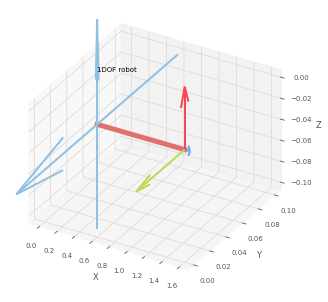

PyPlot3D backend, t = 10.000000000000007, scene:
  1DOF robot

<Figure size 432x288 with 0 Axes>

In [11]:
############### animation 
q = q.reshape(n,1)
l = 1
robot = DHRobot([ RevoluteMDH(alpha=m.pi/2, offset=np.pi/2), RevoluteMDH(d=l, alpha=m.pi/2), ], base=SE3(0.6, 0, 0), name = '1DOF robot')
zers  = np.zeros_like(q)
coord = np.concatenate((q,zers),axis=1)
robot.plot(coord, movie='1dof.gif', dt=tf/n, shadow=False)